In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
pd.options.display.max_columns = None

## Load Date

In [2]:
df1 = pd.read_csv('walmart_train.csv').drop('index', axis = 1)
df1.Date = pd.to_datetime(df1.Date)

df2 = pd.read_csv('stores.csv').drop('index', axis = 1)

df3 =  pd.read_csv('features.csv').drop('index', axis = 1)
df3.Date = pd.to_datetime(df3.Date)

## Data Integrate

In [3]:
DI = pd.merge(df1, df3, on = ['Store', 'Date', 'IsHoliday'], how='inner')
DI = pd.merge(DI, df2, on = ['Store'], how = 'inner')
DI['Date'] = DI['Date'].dt.strftime('%Y-%m-%d')

In [4]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### MarkDowns

In [5]:
DI = DI.assign(MD1_present = DI.MarkDown1.notnull())
DI = DI.assign(MD2_present = DI.MarkDown2.notnull())
DI = DI.assign(MD3_present = DI.MarkDown3.notnull())
DI = DI.assign(MD4_present = DI.MarkDown4.notnull())
DI = DI.assign(MD5_present = DI.MarkDown5.notnull())
DI = DI.fillna(value = 0)

In [6]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MD1_present,MD2_present,MD3_present,MD4_present,MD5_present
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False


### Type

In [7]:
df = pd.get_dummies(DI.Type)
DI = pd.concat([DI, df], axis = 1)

In [8]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MD1_present,MD2_present,MD3_present,MD4_present,MD5_present,A,B,C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0


### IsHoliday

In [9]:
ih = pd.get_dummies(DI['IsHoliday'])
ih.columns = ['IsHoliday_False', 'IsHoliday_True']
DI = pd.concat([DI, ih], axis = 1)

In [10]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MD1_present,MD2_present,MD3_present,MD4_present,MD5_present,A,B,C,IsHoliday_False,IsHoliday_True
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0


### Store

In [11]:
s = pd.get_dummies(DI.Store)
s_names = []
for i in range(1, 46):
    s_names.append('Store_' + str(i))
s.columns = s_names
DI = pd.concat([DI, s], axis = 1)

In [12]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MD1_present,MD2_present,MD3_present,MD4_present,MD5_present,A,B,C,IsHoliday_False,IsHoliday_True,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dept

In [13]:
DI.Dept.unique().shape

(81,)

In [14]:
d = pd.get_dummies(DI.Dept)
d_names = []
for i in range(1, 82):
    d_names.append('Dept_' + str(i))
d.columns = d_names
DI = pd.concat([DI, d], axis = 1)

In [15]:
DI.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MD1_present,MD2_present,MD3_present,MD4_present,MD5_present,A,B,C,IsHoliday_False,IsHoliday_True,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Dept_9,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_15,Dept_16,Dept_17,Dept_18,Dept_19,Dept_20,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_53,Dept_54,Dept_55,Dept_56,Dept_57,Dept_58,Dept_59,Dept_60,Dept_61,Dept_62,Dept_63,Dept_64,Dept_65,Dept_66,Dept_67,Dept_68,Dept_69,Dept_70,Dept_71,Dept_72,Dept_73,Dept_74,Dept_75,Dept_76,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,False,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Special Days
1. Black Friday
2. Christmas
3. Others

In [16]:
years = []
for day in DI['Date'].values:
    years.append(int(day[0:4]))
np.unique(years)

array([2010, 2011, 2012])

In [17]:
agg_sales = DI[['Date', 'Weekly_Sales']].copy()
agg_sales['Date'] = pd.to_datetime(agg_sales.Date)
agg_sales = agg_sales.sort_index()
agg_sales = agg_sales.groupby('Date').agg({'Weekly_Sales': 'sum'})
agg_sales.shape

(143, 1)

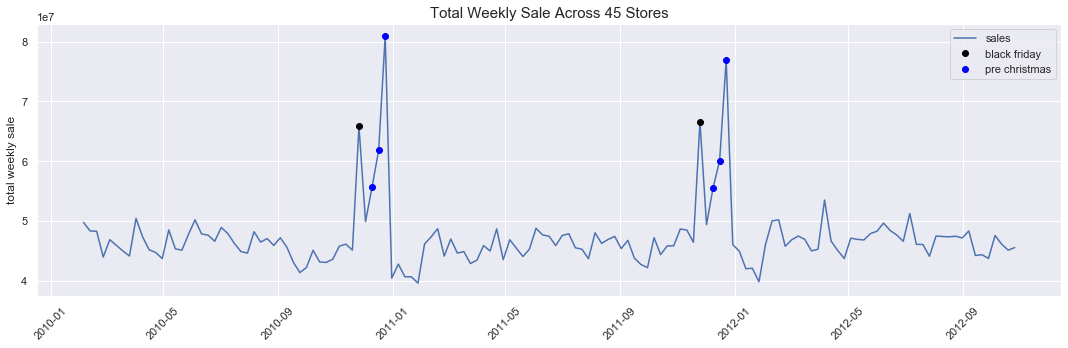

In [28]:
large_sales = agg_sales[agg_sales.Weekly_Sales > 5.2e7]
plt.figure(figsize = (15, 5))
plt.plot(agg_sales['Weekly_Sales'], label = 'sales')
plt.plot(large_sales['Weekly_Sales'].iloc[[0, 4]], 'o', color = 'black', label = 'black friday')
plt.plot(large_sales['Weekly_Sales'].iloc[[1, 2, 3, 5, 6, 7]], 'o', color = 'blue', label = 'pre christmas')
plt.xticks(rotation = 45)
plt.ylabel('total weekly sale')
plt.title('Total Weekly Sale Across 45 Stores', fontsize = 15)
plt.legend()
plt.tight_layout()

#### Black Friday
1. 2010-11-26
2. 2011-11-25
3. 2012-11-23

#### black friday in dataset:
1. 2010-11-26
2. 2011-11-25

In [ ]:
black_friday = pd.DataFrame(columns = ['BlackFriday_True', 'BlackFriday_False'],
                            data = np.zeros((len(DI), 2)))
black_friday['Date'] = DI['Date']
black_friday.loc[(black_friday['Date'] == '2010-11-26') | (black_friday['Date'] == '2011-11-26'), 'BlackFriday_True'] = 1
black_friday.loc[(black_friday['Date'] != '2010-11-26') & (black_friday['Date'] != '2011-11-26'), 'BlackFriday_False'] = 1

black_friday = black_friday.drop('Date', axis = 1).astype(int)

In [ ]:
DI = pd.concat([DI, black_friday], axis = 1)

In [ ]:
DI.head(2)

**Christmas day**
1. 2010-12-25
2. 2011-12-25
3. 2012-12-25

**christmas day in dataset**
1. 2010: 12/10, 12/17, 12/24
2. 2011: 12/09, 12/16, 12/23

**right after christmas**
1. 2010: 12/31, 01/07, 01/14, 01/21
2. 2011: 12/30, 01/06, 01/13, 01/20

In [ ]:
christmas_day = pd.DataFrame(columns = ['ChristmasSoon_True', 'ChristmasSoon_False',
                                        'ChristmasJustEnd_True', 'ChristmasJustEnd_False'],
                             data = np.zeros((len(DI), 4)))
christmas_day['Date'] = DI['Date']

In [ ]:
soon_days = ['2010-12-10', '2010-12-17', '2010-12-24',
             '2011-12-09', '2011-12-16', '2011-12-23']

end_days = ['2010-12-31', '2010-01-07', '2010-01-14', '2010-01-21',
            '2011-12-30', '2011-01-06', '2011-01-13', '2011-01-20']

In [ ]:
for day in soon_days:
    christmas_day.loc[christmas_day['Date'] == day, 'ChristmasSoon_True'] = 1
christmas_day.loc[christmas_day.ChristmasSoon_True == 0, 'ChristmasSoon_False'] = 1

In [ ]:
for day in end_days:
    christmas_day.loc[christmas_day['Date'] == day, 'ChristmasJustEnd_True'] = 1
christmas_day.loc[christmas_day.ChristmasJustEnd_True == 0, 'ChristmasJustEnd_False'] = 1

In [ ]:
DI = pd.concat([DI, christmas_day.drop('Date', axis = 1)], axis = 1)

In [ ]:
DI.head()

### Date

In [ ]:
month = []
for i in range(len(DI)):
    month.append(int(DI['Date'].values[i][5:7]))
month = pd.DataFrame(data = month, columns = ['M'])

In [ ]:
month = pd.get_dummies(month.M)
m_names = []
for i in range(1, 13):
    m_names.append('M_' + str(i))
month.columns = m_names

In [ ]:
DI = pd.concat([DI, month], axis = 1)

In [ ]:
DI.head()

### Temperature

- Hot:  78 - 95
- Warm: 66 - 78
- Mild: 55 - 66
- Cool: 38 - 55
- Cold: 21 - 38

In [ ]:
Temp_Encode = []
for temp in DI['Temperature'].values:
    if temp >= 78:
        Temp_Encode.append('hot')
    elif (temp >= 66) and (temp < 78):
        Temp_Encode.append('warm')
    elif (temp >= 55) and (temp < 66):
        Temp_Encode.append('mild')
    elif (temp >= 38) and (temp < 55):
        Temp_Encode.append('cool')
    else:
        Temp_Encode.append('cold')

In [ ]:
t = pd.DataFrame(Temp_Encode)
t.columns = ['Degree']
t = pd.get_dummies(pd.DataFrame(t))

In [ ]:
DI = pd.concat([DI, t], axis = 1)

In [ ]:
DI.head()

### Size

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(DI['Size'], DI['Weekly_Sales'])
plt.xticks(rotation = 45)

### Median Weekly_Sales

In [ ]:
store = DI['Store'].unique()
dept  = DI['Dept'].unique()

In [ ]:
store_dept = np.zeros((len(store)*len(dept), 2))

i = 0
for s in store:
    for d in dept:
        store_dept[i, 0] = s
        store_dept[i, 1] = d
        i += 1
        
median = pd.DataFrame(columns = ['Store', 'Dept'],
                      data = store_dept).astype(int)

In [ ]:
med = []
for i in range(len(median)):
    store_val, dept_val = median.iloc[i].values
    selected = DI[(DI['Store'] == store_val) & (DI['Dept'] == dept_val)]
    if selected.values.size == 0:
        med.append(np.nan)
    else:
        med.append(selected['Weekly_Sales'].median())
median['Median'] = med

In [ ]:
median = median.dropna()

In [ ]:
DI = pd.merge(DI, median, how = 'inner', on = ['Store', 'Dept'])

In [ ]:
DI.head(5)

In [ ]:
DI.to_csv('Integrated_Walmart_Dataset.csv', index = False)

In [ ]:
DI.isnull().sum().sum()